# Epreuve d'Informatique -- X-ENS 2016
**Thème : Union-Find**

In [360]:
import graphviz as gv
import random

In [400]:

DEFAULT_REP = '../docs/assets/images/union_find'

# graph_attr={'size':'2.4,2.4!'}, 
class Reseau:
    
    def __init__(self, n, liens=None):
        self.__n = n
        self.__liens = [] if liens is None else [{a,b} for a, b in liens]
        self.__pos = {i:None for i in range(n)}
        self.__graph = gv.Graph(engine='neato', format='svg', node_attr={'shape': 'circle', 'width': '0.4'})
        self.__part = Partition(n)
        self.init_graph()
    
    @property
    def n(self):
        return self.__n
    
    @property
    def liens(self):
        return self.__liens
    
    @property
    def graph(self):
        return self.__graph

    @property
    def pos(self):
        return self.__pos
    
    @property
    def partition(self):
        return self.__part
    
    @partition.setter
    def partition(self, part):
        self.__part = part
    
    # ---
    # --- METHODES DU MODELE DE RESEAU
    
    def personnes(self):
        return range(self.n)
    
    def sont_amis(self, i, j):
        return {i,j} in self.liens
    
    def declare_amis(self, i, j):
        if not self.sont_amis(i, j):
            self.liens.append({i,j})
    
    def liste_des_amis_de(self, i):
        return [j for j in self.personnes() if self.sont_amis(i, j)]
    
    def coupe_min_rand(self):
        p = self.partition
        liens_non_marques = list(range(len(self.liens)))
        random.shuffle(liens_non_marques)
        while len(p) >= 3 and liens_non_marques:
            i, j = self.liens[liens_non_marques.pop()]
            if p.representant(i) != p.representant(j):
                p.fusion(i, j)
        if len(p) >= 3:
            print('plus de 2 groupes')

    def taille_coupe(self):
        return len([(i,j) for i,j in self.liens if self.partition.representant(i) != self.partition.representant(j)])
    
    def reset_partition(self):
        self.partition = Partition(self.n)
    
    # ---
    # --- METHODES POUR LE GRAPHE (VUE)
    
    def init_graph(self):
        for node_id in range(self.n):
            self.graph.node(str(node_id), shape='circle')
        for n1, n2 in self.liens:
            self.graph.edge(str(n1), str(n2))
    
    def positionne(self, nodes_positions):
        for i, x, y in nodes_positions:
            self.pos[i] = (x, y)
            
    def place(self, ech):
        for n, (x, y) in self.pos.items():
            self.graph.node(str(n), pos=f'{ech*x},{ech*y}!')          
        
            
    def write(self, filename='test', rep=DEFAULT_REP):
        self.graph.render(f'{rep}/{filename}', view=True)
        
    def saggital(self):
        return self.partition.saggital

In [ ]:
import graph

class Reseau:
    
    

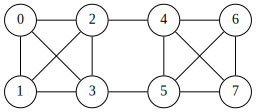

In [414]:
FIG1 = Reseau(8, [(0, 1), (1, 3), (3, 2), (2, 0), (0, 3), (2, 1), (4, 5), (5, 7), (7, 6), (6, 4), (7, 4), (6, 5), (2, 4), (5, 3)])
FIG1.positionne([(0,-3,1), (2, -1, 1), (4, 1, 1), (6, 3, 1), (1,-3,-1), (3, -1, -1), (5, 1, -1), (7, 3, -1)])
FIG1.place(0.5)
FIG1.graph

In [450]:
T = []
for _ in range(1000):
    FIG1.reset_partition()
    FIG1.coupe_min_rand()
    e = FIG1.taille_coupe()
    T.append(e)    

In [451]:
HISTO = {i:0 for i in range(min(T), max(T)+1)}
for e in T:
    HISTO[e] += 1

In [452]:
for e, v in HISTO.items():
    print(f'{e} : {v/len(T):.2%}')

2 : 21.90%
3 : 36.80%
4 : 31.50%
5 : 7.40%
6 : 1.50%
7 : 0.70%
8 : 0.20%


In [453]:
1/8

0.125

In [467]:
ok = 0
for _ in range(10000):
    FIG1.reset_partition()
    FIG1.coupe_min_rand()
    if FIG1.taille_coupe() == 2:
        ok += 1

In [468]:
ok

2150

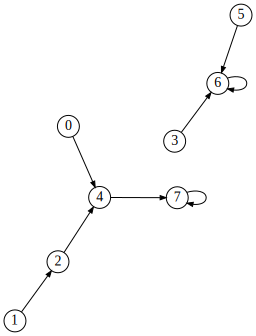

In [449]:
FIG1.saggital()

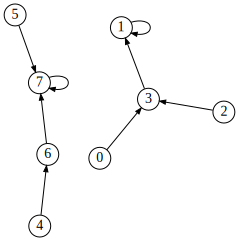

In [436]:
FIG1.saggital()

In [423]:
FIG1.partition.positionne([(0,-3,1), (2, -1, 1), (4, 1, 1), (6, 3, 1), (1,-3,-1), (3, -1, -1), (5, 1, -1), (7, 3, -1)])

In [426]:
FIG1.partition.place(0.5)

In [428]:
FIG1.partition.write('coupe2')

In [433]:
FIG1.taille_coupe()

3

In [434]:
FIG1.reset_partition()

## Q6

In [131]:
FIG1.liste_des_amis_de(1)

[0, 2, 3]

## Q1

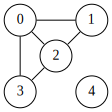

In [112]:
RA = Reseau(5, [{0,1}, {0,2}, {0,3}, {1,2}, {2,3}])
RA.positionne([(2,0,0), (0,-1,1), (3,-1,-1), (1,1,1), (4,1,-1)], 0.5)
RA.graph

In [113]:
RA.write('reseau_A')

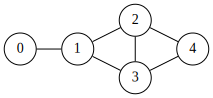

In [121]:
RB = Reseau(5, [{0,1}, {1,2}, {1,3}, {2,3}, {2,4}, {3,4}])
RB.positionne([(2,0,0.5), (0,-2,0), (3,0,-0.5), (1,-1,0), (4,1,0)], 0.8)
RB.graph

In [122]:
RB.write('reseau_B')

## Q2

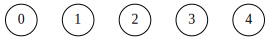

In [126]:
VIDE = Reseau(5)
VIDE.positionne([(0,-2,0), (1,-1,0), (2,0,0), (3,1,0), (4,2,0)], 0.8)
VIDE.graph

In [127]:
VIDE.write('vide5')

## Q3

Inutile ici

## Q4

Méthode `sont_amis(i, j)`

## Q5

Méthode `declare_amis(i, j)`

## Partie II. Les Partitions

In [410]:
class Partition:
    
    def __init__(self, n=0, parent=None, pos=None):
        self.__n = n
        self.__parent = {i:i for i in range(n)} 
        self.__pos = {i:None for i in range(n)}
        if parent is not None:
            for i,j in parent:
                self.__parent[i] = j
        if pos is not None:
            for i in range(n):
                self.__pos[i] = pos[i]
        self.__saggital = None
        self.init_saggital()
    
    @property
    def n(self):
        return self.__n
    
    @property
    def parent(self):
        return self.__parent
            
    @property
    def pos(self):
        return self.__pos
        
    @property
    def saggital(self):
        return self.__saggital
    
    def __len__(self):
        return sum(self.parent[i] == i for i in self.nodes())
    
    # ---
    # --- METHODES DU MODELE DE PARTITION
    
    def nodes(self):
        return range(self.n)
    
    def copy(self):
        return Partition(self.n, self.parent.items(), self.pos)
    
    def representant(self, i, compression=False):
        if compression:
            a = i
            while a != self.parent[a]:
                a = self.parent[a]
            ancetre = a
            a = i
            while a != self.parent[a]:
                b = self.parent[a]
                self.parent[a] = ancetre
                a = b
            self.init_saggital()
            return ancetre
        else:
            while i != self.parent[i]:
                i = self.parent[i]
            return i

    def fusion(self, i, j):
        self.parent[self.representant(i)] = self.representant(j)
        self.init_saggital()
    
    def liste_des_groupes(self):
        groupes = {}
        for i in self.nodes():
            if self.parent[i] == i:
                groupes[i] = [i]
        for i in self.nodes():
            if self.parent[i] != i:            
                groupes[self.representant(i, True)].append(i)
        return list(groupes.values())        

    def reduire(self):
        representants = [i for i in self.nodes()]
        ancetre = 0
        for k in range(2, len(representants)):
            self.fusion(representants[k], representants[ancetre])
            ancetre = 1 - ancetre

    
    # ---
    # --- METHODES POUR LE GRAPHE (VUE)
    
    # 'shape': 'circle'
    
    def init_saggital(self):
        self.__saggital = gv.Digraph(engine='neato', format='svg', node_attr={'shape':'circle', 'width': '0.3', 'fixedsize':'true'},\
                                      edge_attr={'arrowsize':'0.6'})
        for node_id in self.nodes():
            self.saggital.node(str(node_id), shape='circle')
        for i, j in self.parent.items():
            self.saggital.edge(str(i), str(j))
    
    def positionne(self, nodes_positions):
        for i, x, y in nodes_positions:
            self.pos[i] = (x, y)
            
    def deplace(self, i, dx, dy, groupe=True):
        if groupe:
            ancetre = self.representant(i)
            for j in self.nodes():
                if self.representant(j) == ancetre:
                    x, y = self.pos[j]
                    self.pos[j] = x+dx, y+dy
        else:
            x, y = self.pos[i]
            self.pos[i] = x+dx, y+dy
            
    def place(self, ech):
        for n, (x, y) in self.pos.items():
            self.saggital.node(str(n), pos=f'{ech*x},{ech*y}!')
    
    def write(self, filename='test', rep=DEFAULT_REP):
        self.saggital.render(f'{rep}/{filename}', view=True)    
    

In [411]:
VIDE = Partition(5)

In [412]:
VIDE.reduire()

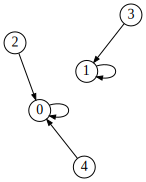

In [413]:
VIDE.saggital

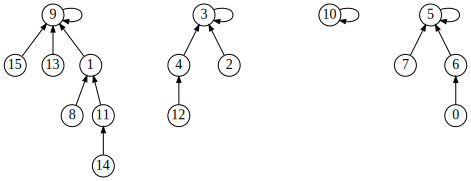

In [358]:
FIG2 = Partition(16, [(14,11), (11,1), (8,1), (1,9), (13,9), (15,9),
                     (12,4), (4,3), (2,3), (7,5), (6,5), (0,6)])
FIG2.positionne([(9,-3.5,1), (3,-0.5,1), (10,2,1), (5,4,1),
                (2,0,0), (4,-1,0), (1,-2.75,0), (13,-3.5,0), (15,-4.25,0), (7,3.5,0), (6,4.5,0),
                (8,-3.12,-1), (11,-2.5,-1), (12,-1,-1), (0,4.5,-1),
                (14,-2.5,-2)])
FIG2.place(0.7)
FIG2.saggital

In [359]:
len(FIG2)

4

In [316]:
FIG2.representant(14, True)

9

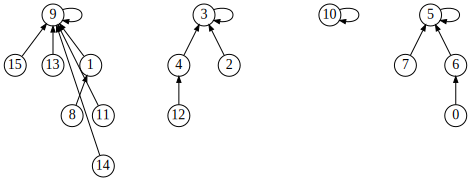

In [294]:
FIG2.place(0.7)
FIG2.saggital

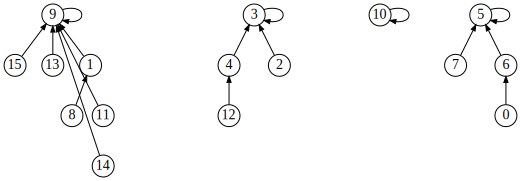

In [317]:
FIG2.deplace(9, -1, 0)
FIG2.place(0.7)
FIG2.saggital

In [ ]:
FIG2.deplace(11, 0.5, 1, False)
FIG2.deplace(14, 1.5, 2, False)
FIG2.place(0.7)

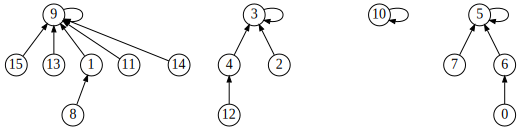

In [319]:
FIG2.saggital

In [299]:
FIG2.write('fig2compresse')

In [198]:
FIG2.representant(9)

9

In [151]:
FIG2.write('fig2')

In [166]:
def tableau(rf):
    print('<table>')
    print('<tr class="underline">')
    print('<td><code>i</code></td>', end='')
    for i in range(len(rf)):
        print(f'<td>{i}</td>',end='')
    print('</tr>')
    print('<tr>')
    print('<td><code>parent[i]</code></td>', end='')
    for i in range(len(rf)):
        print(f'<td>{rf[i]}</td>',end='')
    print('</tr>')
    print('</table>')

In [158]:
P2 = [6,9,3,3,3,5,5,5,1,9,10,1,4,9,11,9]

In [163]:
RFA = [5,1,1,3,4,5,1,5,5,7]
RFB = [3,9,0,3,9,4,4,7,1,9]

In [167]:
tableau(RFA)

<table>
<tr class="underline">
<td><code>i</code></td><td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td><td>9</td></tr>
<tr>
<td><code>parent[i]</code></td><td>5</td><td>1</td><td>1</td><td>3</td><td>4</td><td>5</td><td>1</td><td>5</td><td>5</td><td>7</td></tr>
</table>


In [168]:
tableau(RFB)

<table>
<tr class="underline">
<td><code>i</code></td><td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td><td>9</td></tr>
<tr>
<td><code>parent[i]</code></td><td>3</td><td>9</td><td>0</td><td>3</td><td>9</td><td>4</td><td>4</td><td>7</td><td>1</td><td>9</td></tr>
</table>


In [169]:
PA = Partition(10, [(i, RFA[i]) for i in range(10)])
PB = Partition(10, [(i, RFB[i]) for i in range(10)])

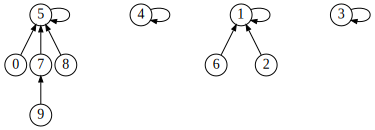

In [173]:
PA.positionne([(5,-3,1), (4,-1,1), (1,1,1), (3,3,1),
              (0,-3.5,0), (7,-3,0), (8,-2.5,0), (6,0.5,0), (2,1.5,0),
              (9,-3,-1)], 0.7)
PA.graph

In [174]:
PA.write('filiale_A')

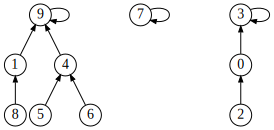

In [178]:
PB.positionne([(9,-2,1), (7,0,1), (3,2,1),
              (1,-2.5,0), (4,-1.5,0), (0,2,0),
              (8,-2.5,-1), (5,-2,-1), (6,-1,-1), (2,2,-1)], 0.7)
PB.graph

In [179]:
PB.write('filiale_B')

In [181]:
PSINGLETONS5 = Partition(5)

In [184]:
PSINGLETONS5.positionne([(4,-2,0), (3,-1,0), (2,0,0), (1,1,0), (0,2,0)], 0.7)
PSINGLETONS5.graph

In [185]:
PSINGLETONS5.write('singletons5')

In [276]:
FIG3 = FIG2.copy()

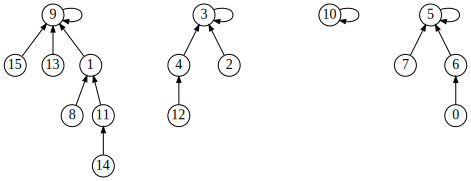

In [277]:
FIG3.place(0.7)
FIG3.graph

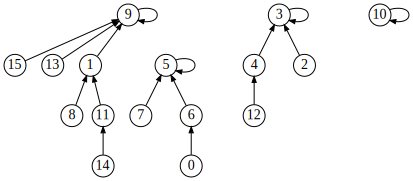

In [278]:
FIG3.deplace(3, 1.5, 0)
FIG3.deplace(10, 1, 0)
FIG3.deplace(5, -5.25, -1)
FIG3.deplace(9, 1.5, 0, False)
FIG3.place(0.7)
FIG3.graph

In [279]:
FIG3.write('fig3a')

In [280]:
FIG3.fusion(6, 14)

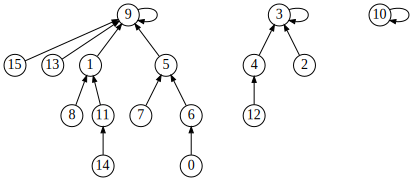

In [282]:
FIG3.place(0.7)
FIG3.graph

In [283]:
FIG3.write('fig3b')

In [331]:
FIG2.liste_des_groupes()

[[3, 2, 4, 12], [5, 0, 6, 7], [9, 1, 8, 11, 13, 14, 15], [10]]

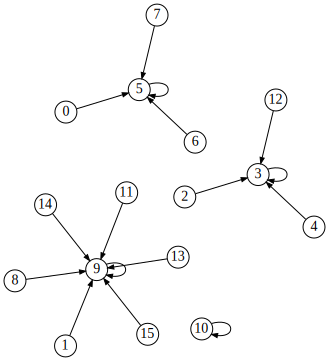

In [332]:
FIG2.saggital

In [334]:
FIG2.positionne([(9,-3.25,1), (1, -4.5, 0), (8, -4, 0), (11, -3.5, 0), (13, -3, 0), (14, -2.5, 0), (15, -2, 0)])
FIG2.positionne([(5, 0, 1), (0, -0.5, 0), (6, 0, 0), (7, 0.5, 0)])
FIG2.positionne([(3, 3, 1), (2, 2.5, 0), (4, 3, 0), (12, 3.5, 0)])
FIG2.positionne([(10, 4, 1)])

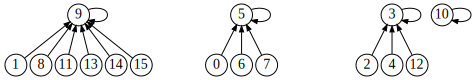

In [335]:
FIG2.place(0.7)
FIG2.saggital

In [336]:
FIG2.deplace(5, -0.5, 0)
FIG2.deplace(3, -1, 0)
FIG2.deplace(10, -0.5, 0)

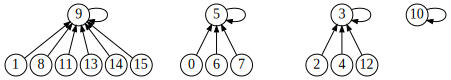

In [337]:
FIG2.place(0.7)
FIG2.saggital

In [338]:
FIG2.write('liste_groupes')